<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 8.3: Working with Text
- Using [NLTK](http://www.nltk.org) (Natural Language Toolkit)
- Using [spaCy](https://spacy.io)

INSTRUCTIONS:
- Run the cells
- Observe and understand the results
- Answer the questions

## Import libraries

In [4]:
## Import Libraries
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter

import regex as re
import spacy
import nltk

## Load data

In [6]:
## Loading the data

input_file = 'ncc-1701-D.txt'

with open(input_file, 'r') as f:
    text = f.read()

## Inspect the data

In [8]:
print(text[:1000])

USS Enterprise (NCC-1701-D)

"For five hundred years, every ship that has borne the name of the Enterprise has become a legend. This one is no different."

The USS Enterprise (NCC-1701-D) was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise. During her career, the Enterprise served as the Federation flagship. The Enterprise was destroyed during the Battle of Veridian III in 2371.

==History==
===Construction and launch===
The Enterprise was built at Utopia Planitia Fleet Yards orbiting Mars in the Solar system. The construction was a massive undertaking, involving thousands of people across disciplines. Construction was supervised by Commander Orfil Quinteros. Dr. Leah Brahms was responsible for much of the Enterprise's warp propulsion system design. Some of the Enterprise's components were derived from technology originally developed on the USS Pegasus.

One of the ship's nacelle tube was

## Work the data
- if necessary or desired
    - remove text or content, e.g. quotes (") or metadata (===)
    - add content or markers, e.g. (#FLAG, --NAME--)
    - remove or convert special symbols, e.g. "é" to "e"
    - remove or convert emoticons

In [10]:
# ANSWER
def clean_text(text):
    # Remove metadata markers
    text = re.sub(r'\n==+.*==+', '', text)
    text = re.sub(r'--.*--', '', text)

    # Remove quotes
    text = text.replace('"', '')

    # Remove extra spaces and newlines
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [11]:
# Clean the text
cleaned_text = clean_text(text)
print(cleaned_text)

USS Enterprise (NCC-1701-D) For five hundred years, every ship that has borne the name of the Enterprise has become a legend. This one is no different. The USS Enterprise (NCC-1701-D) was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise. During her career, the Enterprise served as the Federation flagship. The Enterprise was destroyed during the Battle of Veridian III in 2371. The Enterprise was built at Utopia Planitia Fleet Yards orbiting Mars in the Solar system. The construction was a massive undertaking, involving thousands of people across disciplines. Construction was supervised by Commander Orfil Quinteros. Dr. Leah Brahms was responsible for much of the Enterprise's warp propulsion system design. Some of the Enterprise's components were derived from technology originally developed on the USS Pegasus. One of the ship's nacelle tube was the site of a multiple murder-suicide while she

## Helper method

In [13]:
# create a bar chart of the frequency of the words in the text
def plot_words(tokens, top = 30):
    tokens_counter = Counter(tokens)
    tok = [t for (t, _) in tokens_counter.most_common()]
    val = [v for (_, v) in tokens_counter.most_common()]

    plt.figure(figsize = (16, 6))
    plt.bar(tok[:top], val[:top])
    plt.title('Number of terms: %d' % len(tokens_counter))
    plt.xticks(rotation = 90)

    plt.show()

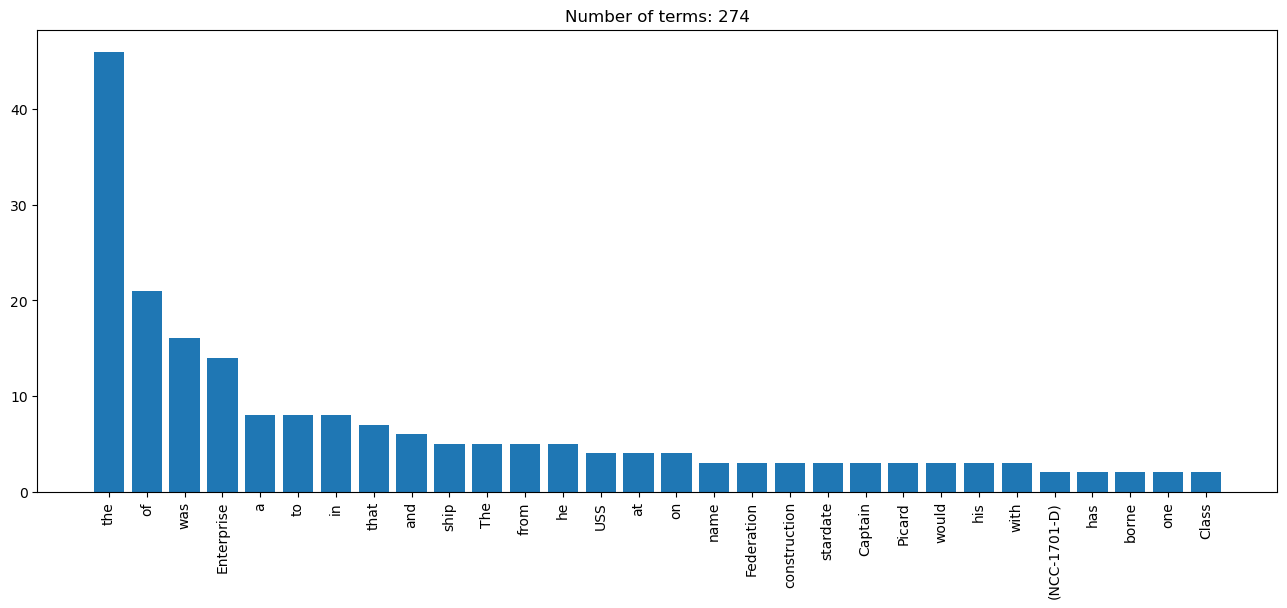

In [14]:
tokens = text.split()
plot_words(tokens)

## spaCy model invocation and text processing
spaCy does the processing of the text as part of the reading of the data.

In [16]:
# load spaCy and the English model
#!python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

# process the text
doc = nlp(cleaned_text)

## Tokenise

In [18]:
# only show the results
# spaCy has done it already
for i, t in enumerate(doc):
    print('%2d| %r' % (i+1, t.text))
    if t.text == '.':
        break

 1| 'USS'
 2| 'Enterprise'
 3| '('
 4| 'NCC-1701'
 5| '-'
 6| 'D'
 7| ')'
 8| 'For'
 9| 'five'
10| 'hundred'
11| 'years'
12| ','
13| 'every'
14| 'ship'
15| 'that'
16| 'has'
17| 'borne'
18| 'the'
19| 'name'
20| 'of'
21| 'the'
22| 'Enterprise'
23| 'has'
24| 'become'
25| 'a'
26| 'legend'
27| '.'


In [19]:
# ANSWER

### Stop Words

In [21]:
## spaCy
print('i | with stop words without')
print('--| --------------- ------------')

# for all the tokens
for i, t in enumerate(doc):
    print('%2d| %-15r %r' % (i+1, t.text, ('' if t.is_stop else t.text)))

    # break after the first sentence
    if t.text == '.':
        break

i | with stop words without
--| --------------- ------------
 1| 'USS'           'USS'
 2| 'Enterprise'    'Enterprise'
 3| '('             '('
 4| 'NCC-1701'      'NCC-1701'
 5| '-'             '-'
 6| 'D'             'D'
 7| ')'             ')'
 8| 'For'           ''
 9| 'five'          ''
10| 'hundred'       ''
11| 'years'         'years'
12| ','             ','
13| 'every'         ''
14| 'ship'          'ship'
15| 'that'          ''
16| 'has'           ''
17| 'borne'         'borne'
18| 'the'           ''
19| 'name'          ''
20| 'of'            ''
21| 'the'           ''
22| 'Enterprise'    'Enterprise'
23| 'has'           ''
24| 'become'        ''
25| 'a'             ''
26| 'legend'        'legend'
27| '.'             '.'


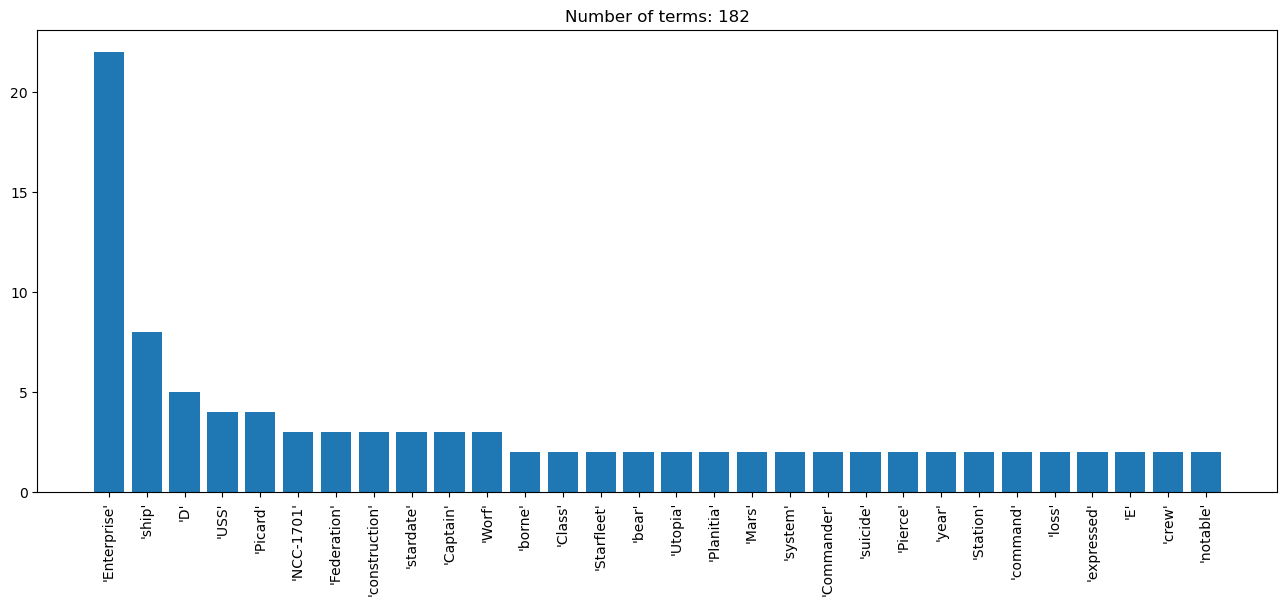

In [22]:
plot_words(['%r' % t.text for t in doc if not (t.is_stop | t.is_punct)])

### Check Part of Speech

In [24]:
## spaCy
for i, t in enumerate(doc):
    print('%2d|%-12r : %-5s %s' % (i+1, t.text, t.pos_, t.tag_))
    if t.text == '.':
        break

 1|'USS'        : PROPN NNP
 2|'Enterprise' : PROPN NNP
 3|'('          : PUNCT -LRB-
 4|'NCC-1701'   : PROPN NNP
 5|'-'          : PUNCT HYPH
 6|'D'          : PROPN NNP
 7|')'          : PUNCT -RRB-
 8|'For'        : ADP   IN
 9|'five'       : NUM   CD
10|'hundred'    : NUM   CD
11|'years'      : NOUN  NNS
12|','          : PUNCT ,
13|'every'      : DET   DT
14|'ship'       : NOUN  NN
15|'that'       : PRON  WDT
16|'has'        : AUX   VBZ
17|'borne'      : VERB  VBN
18|'the'        : DET   DT
19|'name'       : NOUN  NN
20|'of'         : ADP   IN
21|'the'        : DET   DT
22|'Enterprise' : PROPN NNP
23|'has'        : AUX   VBZ
24|'become'     : VERB  VBN
25|'a'          : DET   DT
26|'legend'     : NOUN  NN
27|'.'          : PUNCT .


### Lemmatisation

In [26]:
## spaCy
print('i | Token        Lemma')
print('--| ------------ ------------')
for i, t in enumerate(doc):
    print('%2d| %-12r %r' % (i+1, t.text, t.lemma_))
    if t.text == '.':
        break

i | Token        Lemma
--| ------------ ------------
 1| 'USS'        'USS'
 2| 'Enterprise' 'Enterprise'
 3| '('          '('
 4| 'NCC-1701'   'NCC-1701'
 5| '-'          '-'
 6| 'D'          'D'
 7| ')'          ')'
 8| 'For'        'for'
 9| 'five'       'five'
10| 'hundred'    'hundred'
11| 'years'      'year'
12| ','          ','
13| 'every'      'every'
14| 'ship'       'ship'
15| 'that'       'that'
16| 'has'        'have'
17| 'borne'      'bear'
18| 'the'        'the'
19| 'name'       'name'
20| 'of'         'of'
21| 'the'        'the'
22| 'Enterprise' 'Enterprise'
23| 'has'        'have'
24| 'become'     'become'
25| 'a'          'a'
26| 'legend'     'legend'
27| '.'          '.'


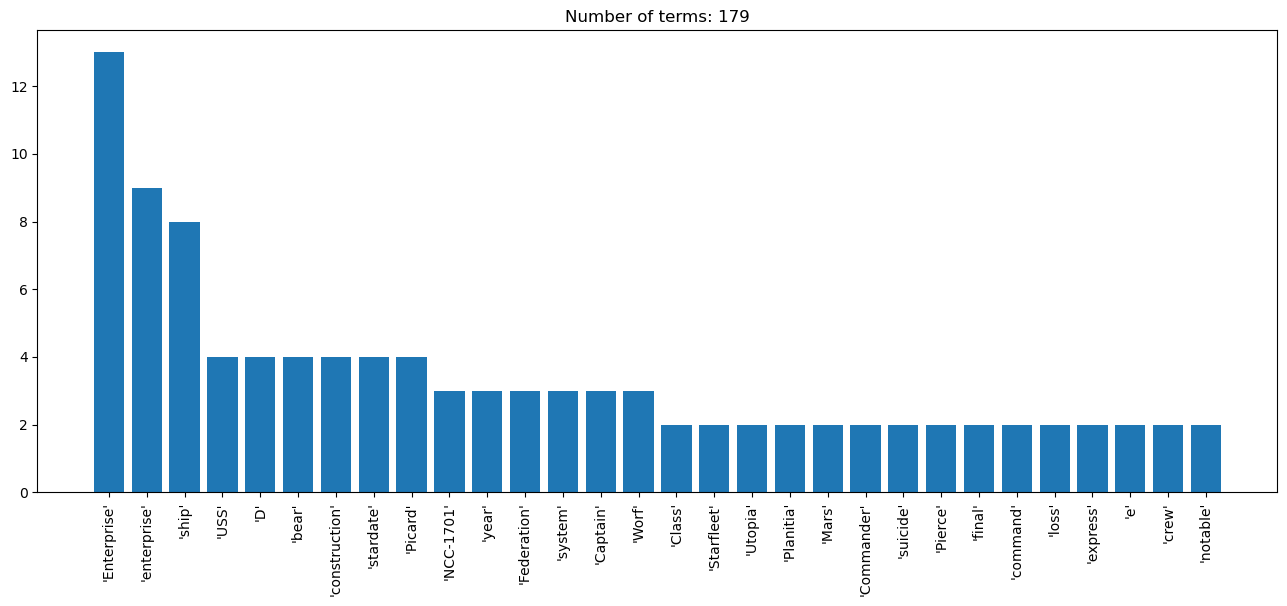

In [27]:
plot_words(['%r' % t.lemma_ for t in doc if not (t.is_stop | t.is_punct)])

### Entity Recognition

In [29]:
## spaCy
for i, s in enumerate(doc.sents):
    print('%2d: %s' % (i, re.sub(r'\n+', '', s.text)))
    if s.as_doc().ents:
        print('-'*80)
        for e in s.as_doc().ents:
            print('%-11s: %s' % (e.label_, re.sub(r'\n+', '', e.text)))
    print('='*80)

 0: USS Enterprise (NCC-1701-D)
 1: For five hundred years, every ship that has borne the name of the Enterprise has become a legend.
--------------------------------------------------------------------------------
DATE       : five hundred years
ORG        : Enterprise
 2: This one is no different.
 3: The USS Enterprise (NCC-1701-D) was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise.
--------------------------------------------------------------------------------
PRODUCT    : The USS Enterprise
DATE       : a 24th century
ORG        : United Federation of Planets Galaxy
ORG        : Starfleet
ORDINAL    : fifth
 4: During her career, the Enterprise served as the Federation flagship.
--------------------------------------------------------------------------------
ORG        : Enterprise
ORG        : Federation
 5: The Enterprise was destroyed during the Battle of Veridian III in 2371.
-

## Extra: Using NLTK for NLP

### Tokenise

In [31]:
#nltk.download()

In [32]:
# use nltk to find tokens
tokens = nltk.word_tokenize(text)

for i, t in enumerate(tokens[:25]):
    print('%2d| %r' % (i+1, t))

 1| 'USS'
 2| 'Enterprise'
 3| '('
 4| 'NCC-1701-D'
 5| ')'
 6| "''"
 7| 'For'
 8| 'five'
 9| 'hundred'
10| 'years'
11| ','
12| 'every'
13| 'ship'
14| 'that'
15| 'has'
16| 'borne'
17| 'the'
18| 'name'
19| 'of'
20| 'the'
21| 'Enterprise'
22| 'has'
23| 'become'
24| 'a'
25| 'legend'


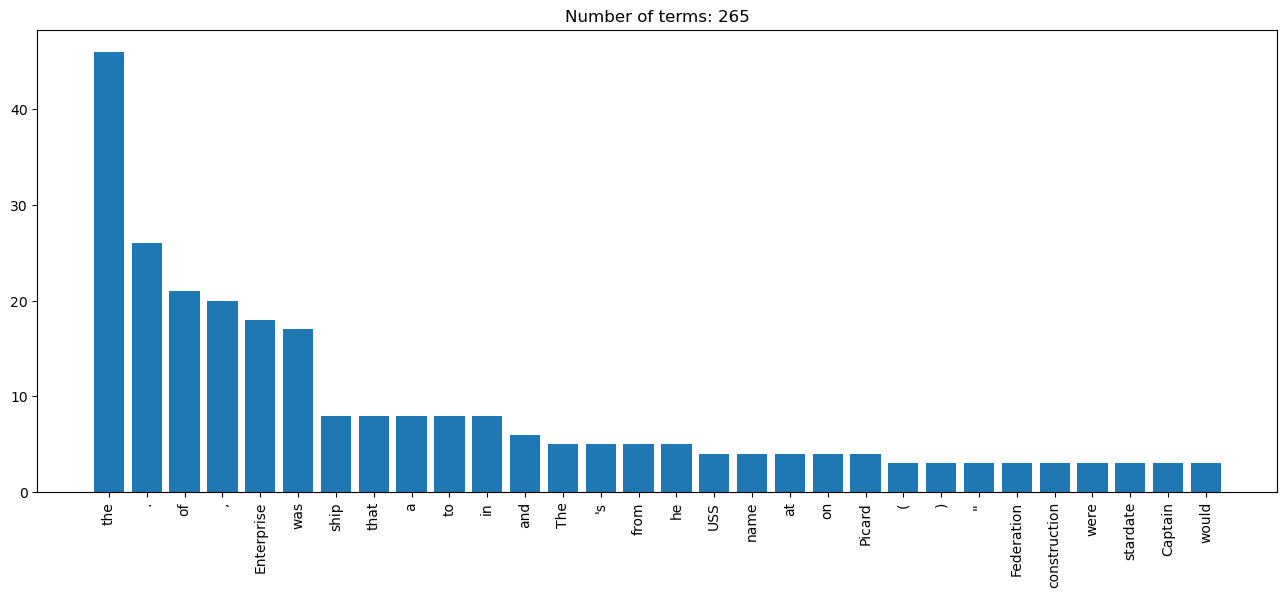

In [33]:
plot_words(tokens)

### Stop words

In [35]:
stopWords = nltk.corpus.stopwords.words('english')

stopWords.sort()
print(', '.join(stopWords))

a, about, above, after, again, against, ain, all, am, an, and, any, are, aren, aren't, as, at, be, because, been, before, being, below, between, both, but, by, can, couldn, couldn't, d, did, didn, didn't, do, does, doesn, doesn't, doing, don, don't, down, during, each, few, for, from, further, had, hadn, hadn't, has, hasn, hasn't, have, haven, haven't, having, he, her, here, hers, herself, him, himself, his, how, i, if, in, into, is, isn, isn't, it, it's, its, itself, just, ll, m, ma, me, mightn, mightn't, more, most, mustn, mustn't, my, myself, needn, needn't, no, nor, not, now, o, of, off, on, once, only, or, other, our, ours, ourselves, out, over, own, re, s, same, shan, shan't, she, she's, should, should've, shouldn, shouldn't, so, some, such, t, than, that, that'll, the, their, theirs, them, themselves, then, there, these, they, this, those, through, to, too, under, until, up, ve, very, was, wasn, wasn't, we, were, weren, weren't, what, when, where, which, while, who, whom, why, w

In [36]:
# ANSWER
# NOTE: see the `.lower()` method applied to token
# Convert tokens to lowercase

tokens_lower = [token.lower() for token in tokens]

In [37]:
tokens_no_stop = [token for token in tokens_lower if token not in stopWords] # create a list of tokens withOUT the stop words
print(tokens_no_stop)

['uss', 'enterprise', '(', 'ncc-1701-d', ')', "''", 'five', 'hundred', 'years', ',', 'every', 'ship', 'borne', 'name', 'enterprise', 'become', 'legend', '.', 'one', 'different', '.', "''", 'uss', 'enterprise', '(', 'ncc-1701-d', ')', '24th', 'century', 'united', 'federation', 'planets', 'galaxy', 'class', 'starship', 'operated', 'starfleet', ',', 'fifth', 'federation', 'ship', 'bear', 'name', 'enterprise', '.', 'career', ',', 'enterprise', 'served', 'federation', 'flagship', '.', 'enterprise', 'destroyed', 'battle', 'veridian', 'iii', '2371', '.', '==history==', '===construction', 'launch===', 'enterprise', 'built', 'utopia', 'planitia', 'fleet', 'yards', 'orbiting', 'mars', 'solar', 'system', '.', 'construction', 'massive', 'undertaking', ',', 'involving', 'thousands', 'people', 'across', 'disciplines', '.', 'construction', 'supervised', 'commander', 'orfil', 'quinteros', '.', 'dr.', 'leah', 'brahms', 'responsible', 'much', 'enterprise', "'s", 'warp', 'propulsion', 'system', 'design',

In [38]:
## NLTK
i = 0
j = 0

print('i | with stop words without')
print('--| --------------- ------------')

# for all the tokens
while i < len(tokens):
    # same word
    if tokens[i] == tokens_no_stop[j]:
        print('%2d| %-15r %r' % (i+1, tokens[i], tokens_no_stop[j]))
        j += 1
    # not the same word
    else:
        print('%2d| %-15r' % (i+1, tokens[i]))

    # next word
    i += 1
    # break after the first sentence
    if tokens[i-1] == '.':
        break

i | with stop words without
--| --------------- ------------
 1| 'USS'          
 2| 'Enterprise'   
 3| '('            
 4| 'NCC-1701-D'   
 5| ')'            
 6| "''"           
 7| 'For'          
 8| 'five'         
 9| 'hundred'      
10| 'years'        
11| ','            
12| 'every'        
13| 'ship'         
14| 'that'         
15| 'has'          
16| 'borne'        
17| 'the'          
18| 'name'         
19| 'of'           
20| 'the'          
21| 'Enterprise'   
22| 'has'          
23| 'become'       
24| 'a'            
25| 'legend'       
26| '.'            


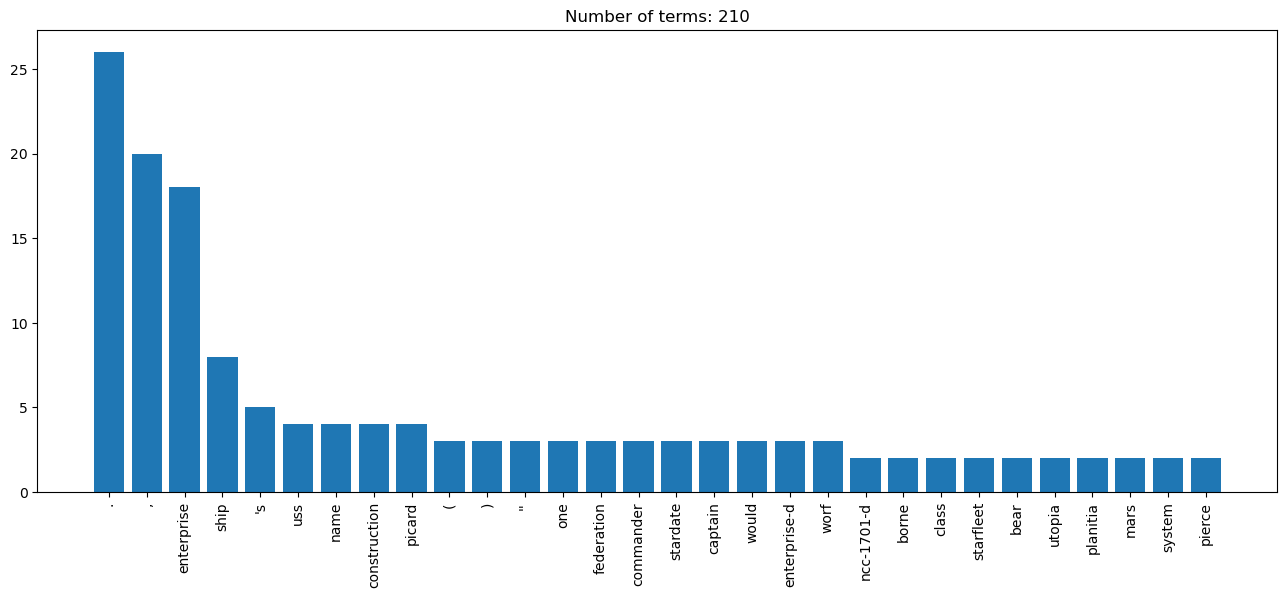

In [39]:
# Create plot of words without stopword
# ANSWER
plot_words(tokens_no_stop)

### Check Part of Speech

In [41]:
# define PoS
pos_list = {
    'CC':   'coordinating conjunction',
    'CD':   'cardinal digit',
    'DT':   'determiner',
    'EX':   'existential there (like: "there is" ... think of it like "there exists")',
    'FW':   'foreign word',
    'IN':   'preposition/subordinating conjunction',
    'JJ':   'adjective "big"',
    'JJR':  'adjective, comparative "bigger"',
    'JJS':  'adjective, superlative "biggest"',
    'LS':   'list marker 1)',
    'MD':   'modal could, will',
    'NN':   'noun, singular "desk"',
    'NNS':  'noun plural "desks"',
    'NNP':  'proper noun, singular "Harrison"',
    'NNPS': 'proper noun, plural "Americans"',
    'PDT':  'predeterminer "all the kids"',
    'POS':  'possessive ending parent"s',
    'PRP':  'personal pronoun I, he, she',
    'PRP$': 'possessive pronoun my, his, hers',
    'RB':   'adverb very, silently,',
    'RBR':  'adverb, comparative better',
    'RBS':  'adverb, superlative best',
    'RP':   'particle give up',
    'TO':   'to go "to" the store.',
    'UH':   'interjection errrrrrrrm',
    'VB':   'verb, base form take',
    'VBD':  'verb, past tense took',
    'VBG':  'verb, gerund/present participle taking',
    'VBN':  'verb, past participle taken',
    'VBP':  'verb, sing. present, non-3d take',
    'VBZ':  'verb, 3rd person sing. present takes',
    'WDT':  'wh-determiner which',
    'WP':   'wh-pronoun who, what',
    'WP$':  'possessive wh-pronoun whose',
    'WRB':  'wh-abverb where, when',
}

In [42]:
## nltk
tagged = nltk.pos_tag(tokens)

for i, t in enumerate(tagged[:25]):
    print('%2d|%-12r : %-4s %s' % (i+1, t[0], t[1], (pos_list[t[1]] if t[1] in pos_list else '-')))

 1|'USS'        : NNP  proper noun, singular "Harrison"
 2|'Enterprise' : NNP  proper noun, singular "Harrison"
 3|'('          : (    -
 4|'NCC-1701-D' : NNP  proper noun, singular "Harrison"
 5|')'          : )    -
 6|"''"         : ''   -
 7|'For'        : IN   preposition/subordinating conjunction
 8|'five'       : CD   cardinal digit
 9|'hundred'    : CD   cardinal digit
10|'years'      : NNS  noun plural "desks"
11|','          : ,    -
12|'every'      : DT   determiner
13|'ship'       : NN   noun, singular "desk"
14|'that'       : WDT  wh-determiner which
15|'has'        : VBZ  verb, 3rd person sing. present takes
16|'borne'      : VBN  verb, past participle taken
17|'the'        : DT   determiner
18|'name'       : NN   noun, singular "desk"
19|'of'         : IN   preposition/subordinating conjunction
20|'the'        : DT   determiner
21|'Enterprise' : NNP  proper noun, singular "Harrison"
22|'has'        : VBZ  verb, 3rd person sing. present takes
23|'become'     : VBN  verb, 

### Stemming

In [44]:
## nltk
ps = nltk.porter.PorterStemmer()
stemmed = ' '.join([ps.stem(word) for word in text.split()])
print(stemmed)

uss enterpris (ncc-1701-d) "for five hundr years, everi ship that ha born the name of the enterpris ha becom a legend. thi one is no different." the uss enterpris (ncc-1701-d) wa a 24th centuri unit feder of planet galaxi class starship oper by starfleet, and the fifth feder ship to bear the name enterprise. dure her career, the enterpris serv as the feder flagship. the enterpris wa destroy dure the battl of veridian iii in 2371. ==history== ===construct and launch=== the enterpris wa built at utopia planitia fleet yard orbit mar in the solar system. the construct wa a massiv undertaking, involv thousand of peopl across disciplines. construct wa supervis by command orfil quinteros. dr. leah brahm wa respons for much of the enterprise' warp propuls system design. some of the enterprise' compon were deriv from technolog origin develop on the uss pegasus. one of the ship' nacel tube wa the site of a multipl murder-suicid while she wa still under construct at utopia planitia. a member of t

### Lemmatisation

In [46]:
## nltk
wl = nltk.stem.WordNetLemmatizer()
lemma = ' '.join([wl.lemmatize(word) for word in text.split()])
print(lemma)

USS Enterprise (NCC-1701-D) "For five hundred years, every ship that ha borne the name of the Enterprise ha become a legend. This one is no different." The USS Enterprise (NCC-1701-D) wa a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise. During her career, the Enterprise served a the Federation flagship. The Enterprise wa destroyed during the Battle of Veridian III in 2371. ==History== ===Construction and launch=== The Enterprise wa built at Utopia Planitia Fleet Yards orbiting Mars in the Solar system. The construction wa a massive undertaking, involving thousand of people across disciplines. Construction wa supervised by Commander Orfil Quinteros. Dr. Leah Brahms wa responsible for much of the Enterprise's warp propulsion system design. Some of the Enterprise's component were derived from technology originally developed on the USS Pegasus. One of the ship's nacelle tube wa the site of a m

In [47]:
## nltk
dot = stemmed.find('.') + 1
sl = stemmed[:dot].split()
dot = lemma.find('.') + 1
ll = lemma[:dot].split()

print('i | Stem           Lemma')
print('--| -------------- ------------')
for i, p in enumerate(zip(sl, ll)):
    print('%2d| %-12r   %-12r' % (i+1, p[0], p[1]))

i | Stem           Lemma
--| -------------- ------------
 1| 'uss'          'USS'       
 2| 'enterpris'    'Enterprise'
 3| '(ncc-1701-d)'   '(NCC-1701-D)'
 4| '"for'         '"For'      
 5| 'five'         'five'      
 6| 'hundr'        'hundred'   
 7| 'years,'       'years,'    
 8| 'everi'        'every'     
 9| 'ship'         'ship'      
10| 'that'         'that'      
11| 'ha'           'ha'        
12| 'born'         'borne'     
13| 'the'          'the'       
14| 'name'         'name'      
15| 'of'           'of'        
16| 'the'          'the'       
17| 'enterpris'    'Enterprise'
18| 'ha'           'ha'        
19| 'becom'        'become'    
20| 'a'            'a'         
21| 'legend.'      'legend.'   


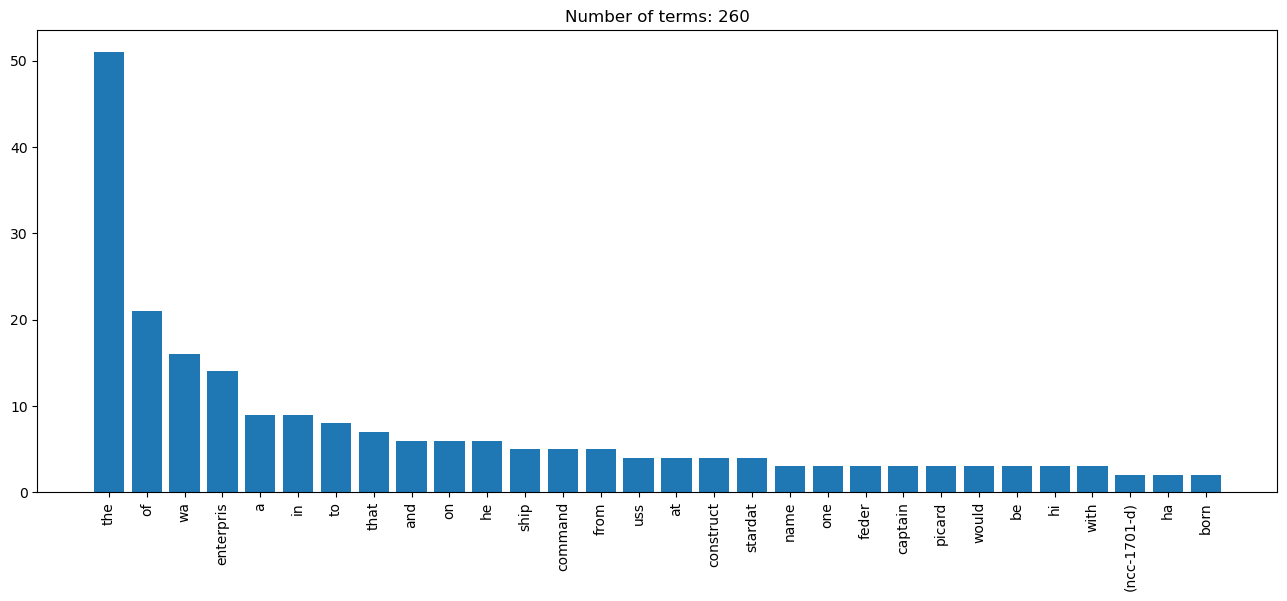

In [48]:
plot_words(stemmed.split())

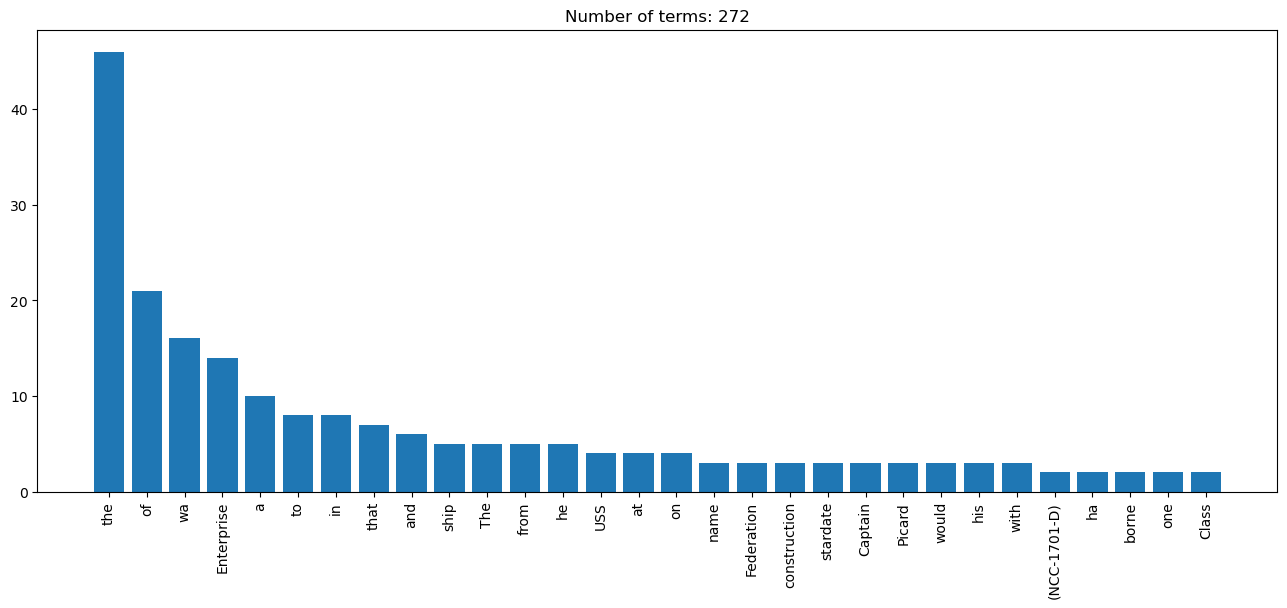

In [49]:
plot_words(lemma.split())

### Entity recognition

In [51]:
## nltk
entities = nltk.chunk.ne_chunk(tagged)

for e in entities:
    s = re.sub(r'[\(\)]', '', str(e))
    if s.find('/NNP') > 0:
        t = s.split()[0]
        n = ' '.join([re.sub(r'/NNP', '', x) for x in s.split()[1:]])
        print('%-12s: %s' % (t, n))

ORGANIZATION: USS Enterprise
ORGANIZATION: Enterprise
ORGANIZATION: USS Enterprise
PERSON      : United Federation
ORGANIZATION: Planets Galaxy
PERSON      : Starfleet
ORGANIZATION: Enterprise
ORGANIZATION: Federation
ORGANIZATION: Battle
GPE         : Veridian
ORGANIZATION: Utopia Planitia Fleet
PERSON      : Mars
ORGANIZATION: Solar
ORGANIZATION: Commander Orfil Quinteros
PERSON      : Brahms
ORGANIZATION: Enterprise
ORGANIZATION: Enterprise
ORGANIZATION: USS Pegasus
ORGANIZATION: Utopia Planitia
PERSON      : Walter Pierce
PERSON      : Marla Finn
PERSON      : William Hodges
PERSON      : Pierce
ORGANIZATION: Enterprise
PERSON      : Mars
ORGANIZATION: Enterprise
ORGANIZATION: Enterprise
FACILITY    : Earth Station McKinley
PERSON      : Captain Jean-Luc Picard
ORGANIZATION: Rear Admiral Norah Satie
ORGANIZATION: Commander Riker
ORGANIZATION: Enterprise
PERSON      : Picard
PERSON      : Deep Space
GPE         : Starfleet
PERSON      : Captain Benjamin Sisko
ORGANIZATION: Enterpris



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



